In [ ]:
# the following is the python notebook to solve loans asignment

/tmp/ipython-input-10-4093042788.py:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")



📄 Dataset: CUSTOMERS
Shape: (70000, 14)
Missing values:
 Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status             0
Employment_Status          0
Annual_Income              0
Credit_Score               0
Region                     0
Account_Tenure             0
Relationship_Manager_ID    0
dtype: int64
Duplicate rows: 0
Data types:
 Customer_ID                object
Full_Name                  object
Contact_Number              int64
Email                      object
Address                    object
Age                         int64
Gender                     object
Marital_Status             object
Employment_Status          object
Annual_Income               int64
Credit_Score                int64
Region                     object
Account_Tenure             object
Relationship_Manager_ID    object
dtype: object

📄

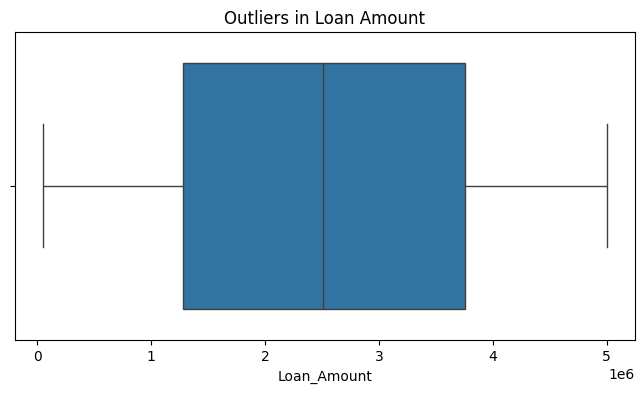

In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Step 2: Load Datasets
customers = pd.read_csv("customers.csv")
loans = pd.read_csv("loans.csv")
applications = pd.read_csv("applications.csv")
transactions = pd.read_csv("transactions.csv")
defaults = pd.read_csv("defaults.csv")
branches = pd.read_csv("branches.csv")

# 🧹 Step 3: Check Shapes, Duplicates, Missing Values
datasets = {
    "customers": customers,
    "loans": loans,
    "applications": applications,
    "transactions": transactions,
    "defaults": defaults,
    "branches": branches
}

for name, df in datasets.items():
    print(f"\n📄 Dataset: {name.upper()}")
    print(f"Shape: {df.shape}")
    print("Missing values:\n", df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    print("Data types:\n", df.dtypes)

# 🗓️ Step 4: Standardize Date Formats
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
applications['Approval_Date'] = pd.to_datetime(applications['Approval_Date'], errors='coerce')
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])
loans['Repayment_Start_Date'] = pd.to_datetime(loans['Repayment_Start_Date'])
loans['Repayment_End_Date'] = pd.to_datetime(loans['Repayment_End_Date'])
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])
defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'])

# 🔢 Step 5: Convert Account_Tenure to Numeric
customers['Account_Tenure_Years'] = customers['Account_Tenure'].str.extract(r'(\d+)').astype(float)

# 🧾 Step 6: Drop Irrelevant Columns (if not needed in analysis)
customers.drop(['Full_Name', 'Contact_Number', 'Email', 'Address', 'Account_Tenure'], axis=1, inplace=True)

# 🚨 Step 7: Outlier Detection Using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

# Example: Outliers in Loan_Amount
outliers_loan_amt = detect_outliers(loans, 'Loan_Amount')
print("\n🚨 Outliers in Loan_Amount:", len(outliers_loan_amt))

# Optional: Visualize Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=loans['Loan_Amount'])
plt.title("Outliers in Loan Amount")
plt.show()


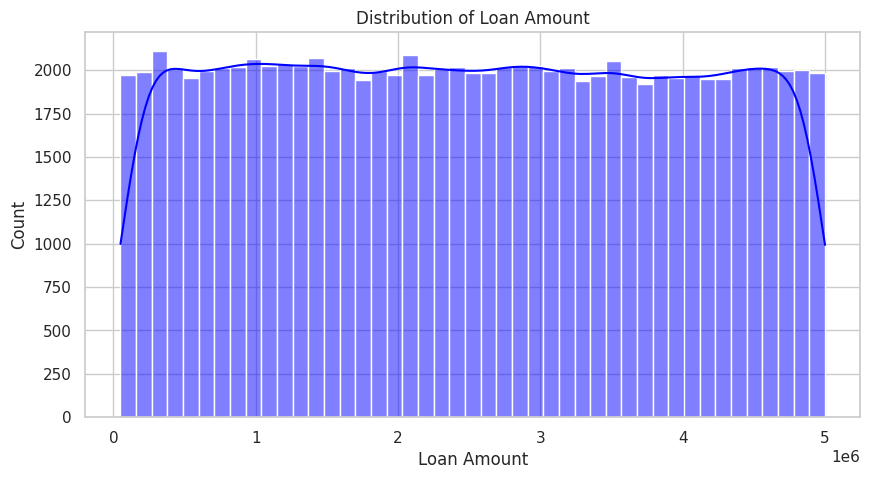

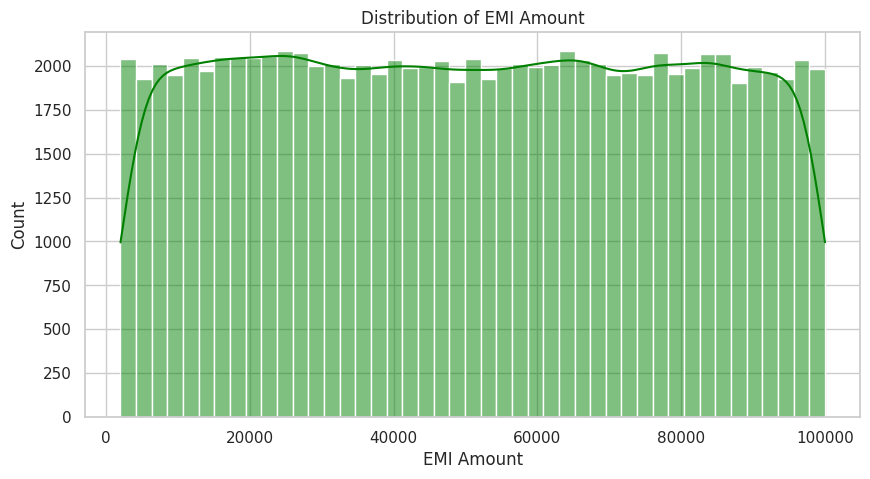

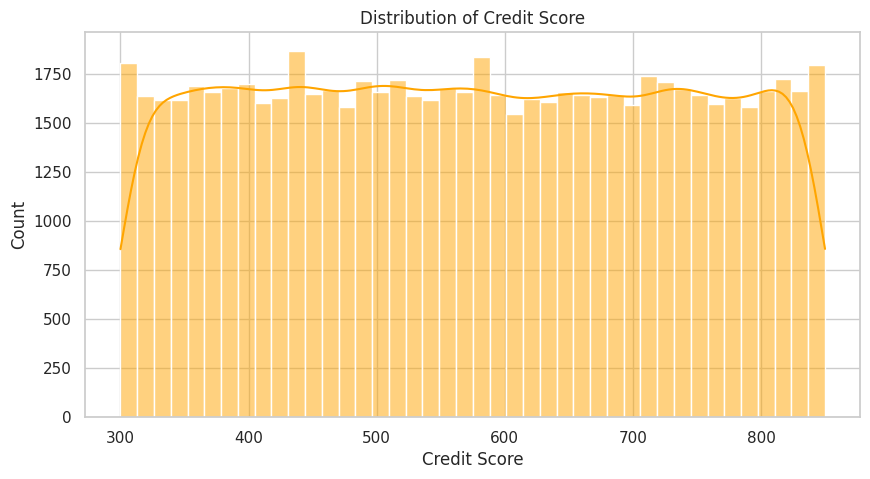

/tmp/ipython-input-11-2366021089.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Set2')


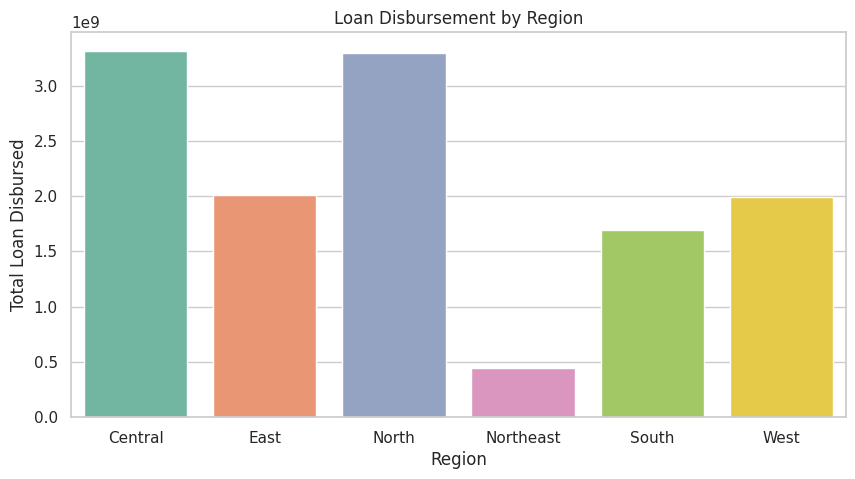

/tmp/ipython-input-11-2366021089.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_defaults, x='Region', y='Default_Amount', palette='Set1')


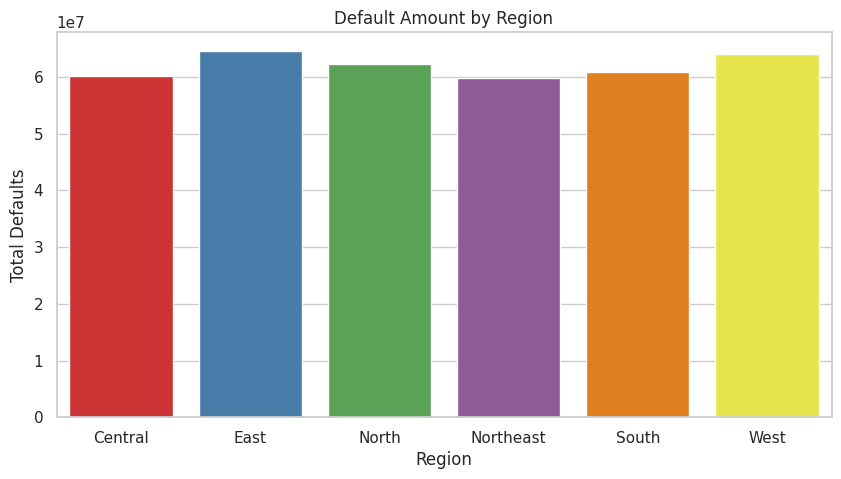

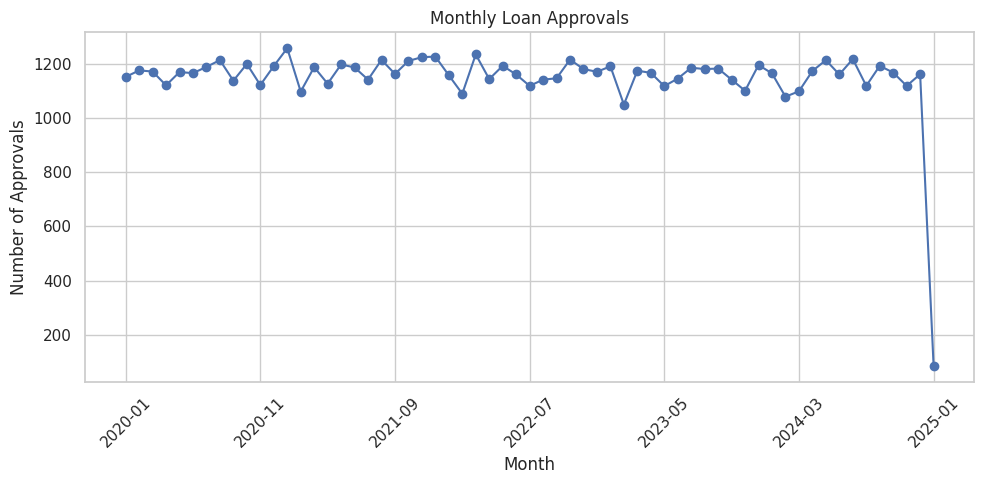

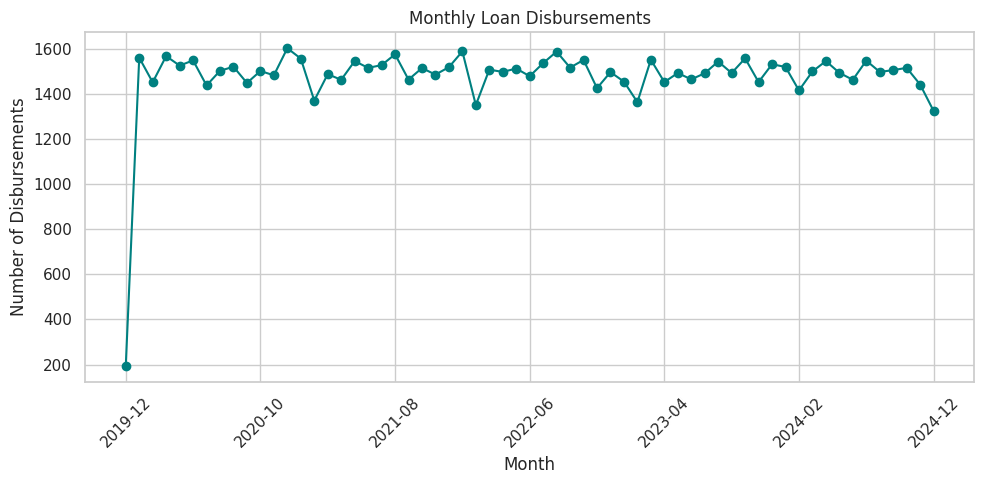

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1️⃣ DISTRIBUTION PLOTS

# Loan Amount
sns.histplot(loans['Loan_Amount'], kde=True, color='blue')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

# EMI Amount
sns.histplot(loans['EMI_Amount'], kde=True, color='green')
plt.title("Distribution of EMI Amount")
plt.xlabel("EMI Amount")
plt.show()

# Credit Score
sns.histplot(customers['Credit_Score'], kde=True, color='orange')
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.show()

# 2️⃣ REGIONAL TRENDS

# a. Loan Disbursement by Region (from branches.csv)
region_disbursement = branches.groupby('Region')['Loan_Disbursement_Amount'].sum().reset_index()

sns.barplot(data=region_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Set2')
plt.title("Loan Disbursement by Region")
plt.ylabel("Total Loan Disbursed")
plt.show()

# b. Default Amount by Region (join customers and defaults)
default_region = pd.merge(defaults, customers[['Customer_ID', 'Region']], on='Customer_ID')
region_defaults = default_region.groupby('Region')['Default_Amount'].sum().reset_index()

sns.barplot(data=region_defaults, x='Region', y='Default_Amount', palette='Set1')
plt.title("Default Amount by Region")
plt.ylabel("Total Defaults")
plt.show()

# 3️⃣ MONTHLY TRENDS

# a. Loan Approvals Over Time
applications['Approval_Month'] = applications['Approval_Date'].dt.to_period('M').astype(str)
monthly_approvals = applications[applications['Approval_Status'] == 'Approved'].groupby('Approval_Month').size()

monthly_approvals.plot(kind='line', marker='o', title='Monthly Loan Approvals')
plt.xlabel("Month")
plt.ylabel("Number of Approvals")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# b. Loan Disbursements Over Time
loans['Disbursal_Month'] = loans['Disbursal_Date'].dt.to_period('M').astype(str)
monthly_disbursals = loans.groupby('Disbursal_Month').size()

monthly_disbursals.plot(kind='line', marker='o', title='Monthly Loan Disbursements', color='teal')
plt.xlabel("Month")
plt.ylabel("Number of Disbursements")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


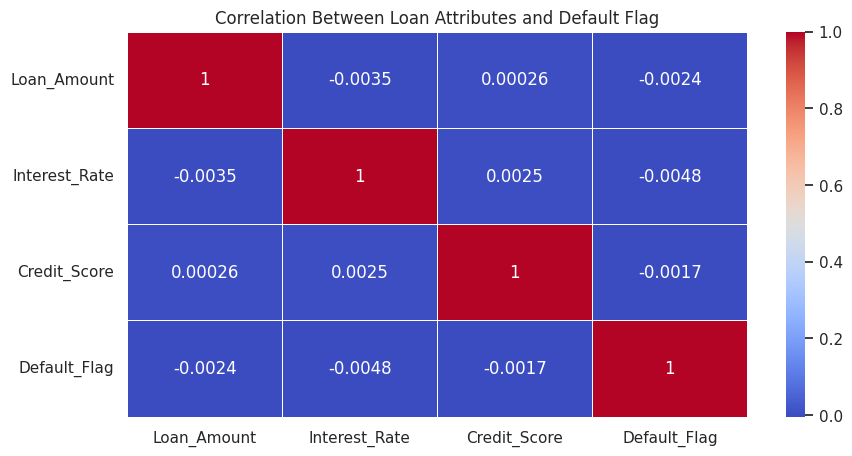

In [ ]:
# Step 1: Create Default_Flag from defaults
defaulted_loans = defaults[['Loan_ID']].copy()
defaulted_loans['Default_Flag'] = 1

# Step 2: Merge loans with Default_Flag
loans_merged = loans.merge(defaulted_loans, on='Loan_ID', how='left')
loans_merged['Default_Flag'] = loans_merged['Default_Flag'].fillna(0)

# Step 3: Merge loans with customers
loan_customer = loans_merged.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Step 4: Keep only required columns
correlation_df = loan_customer[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']]

# Step 5: Calculate correlations
correlation_matrix = correlation_df.corr()

# Step 6: Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Loan Attributes and Default Flag")
plt.show()


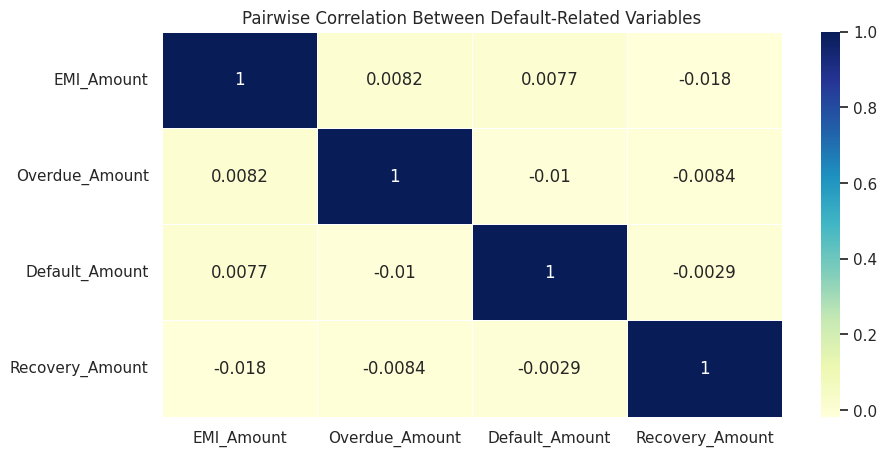

In [ ]:
# Step 1: Merge loans and defaults on Loan_ID
loan_defaults = loans.merge(defaults[['Loan_ID', 'Default_Amount', 'Recovery_Amount']], on='Loan_ID', how='inner')

# Step 2: Select key numeric columns for analysis
pairwise_df = loan_defaults[['EMI_Amount', 'Overdue_Amount', 'Default_Amount', 'Recovery_Amount']]

# Step 3: Correlation Matrix
pairwise_corr = pairwise_df.corr()

# Step 4: Visualize
sns.heatmap(pairwise_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Pairwise Correlation Between Default-Related Variables")
plt.show()


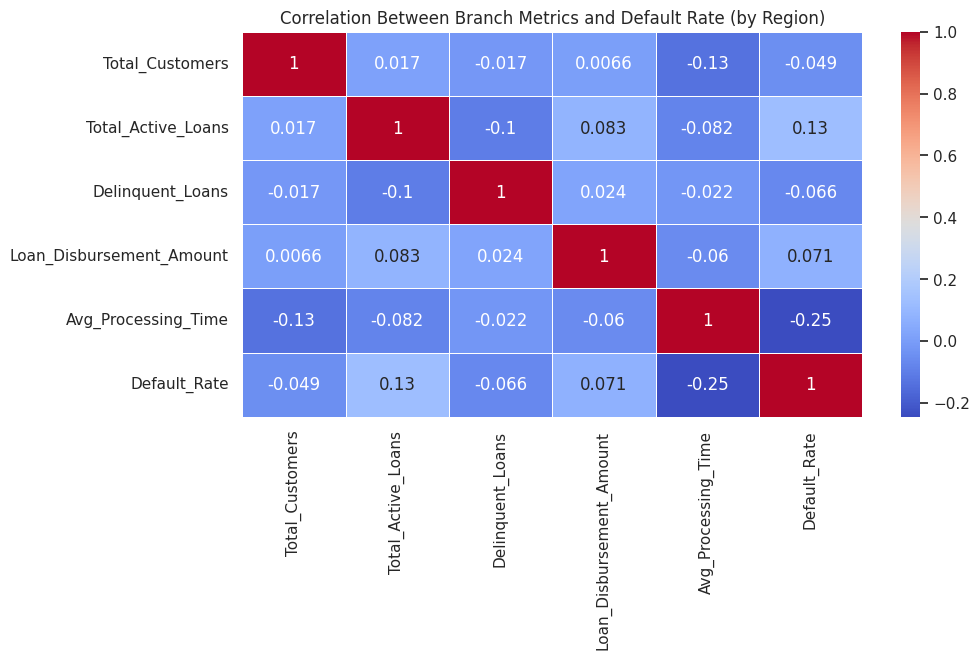

In [ ]:
# Step 1: Create Default_Flag from defaults
defaults_flag = defaults[['Loan_ID']].copy()
defaults_flag['Default_Flag'] = 1

# Step 2: Merge loans with Default_Flag
loan_flags = loans.merge(defaults_flag, on='Loan_ID', how='left')
loan_flags['Default_Flag'] = loan_flags['Default_Flag'].fillna(0)

# Step 3: Merge loan_flags with customers to get Region
loan_customer_region = loan_flags.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Step 4: Count total and defaulted loans per region
region_default_summary = loan_customer_region.groupby('Region').agg({
    'Loan_ID': 'count',
    'Default_Flag': 'sum'
}).rename(columns={
    'Loan_ID': 'Total_Loans',
    'Default_Flag': 'Defaults'
})

region_default_summary['Default_Rate'] = region_default_summary['Defaults'] / region_default_summary['Total_Loans']

# Step 5: Merge with branch metrics (now using Region)
branch_analysis = branches.merge(region_default_summary, on='Region', how='left')

# Fill missing defaults as 0 (for regions with no defaults)
branch_analysis[['Defaults', 'Default_Rate']] = branch_analysis[['Defaults', 'Default_Rate']].fillna(0)

# Step 6: Correlation Matrix
metrics = ['Total_Customers', 'Total_Active_Loans', 'Delinquent_Loans',
           'Loan_Disbursement_Amount', 'Avg_Processing_Time', 'Default_Rate']

branch_corr = branch_analysis[metrics].corr()

# Step 7: Visualize
sns.heatmap(branch_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Branch Metrics and Default Rate (by Region)")
plt.show()

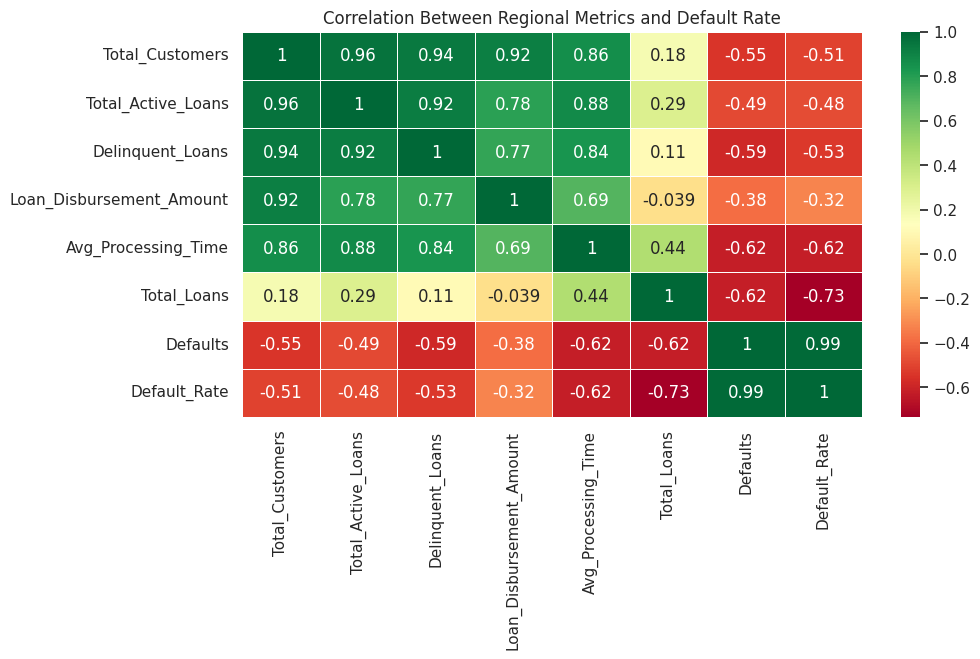

In [ ]:
# Step 1: Add region to loans via customers
loan_with_region = loans.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Step 2: Add Default_Flag
default_flag = defaults[['Loan_ID']].copy()
default_flag['Default_Flag'] = 1
loan_with_region = loan_with_region.merge(default_flag, on='Loan_ID', how='left')
loan_with_region['Default_Flag'] = loan_with_region['Default_Flag'].fillna(0)

# Step 3: Regional Default Summary
regional_defaults = loan_with_region.groupby('Region').agg(
    Total_Loans=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

regional_defaults['Default_Rate'] = regional_defaults['Defaults'] / regional_defaults['Total_Loans']

# Step 4: Regional Branch Metrics (aggregate from branches.csv)
regional_branches = branches.groupby('Region').agg(
    Total_Customers=('Total_Customers', 'sum'),
    Total_Active_Loans=('Total_Active_Loans', 'sum'),
    Delinquent_Loans=('Delinquent_Loans', 'sum'),
    Loan_Disbursement_Amount=('Loan_Disbursement_Amount', 'sum'),
    Avg_Processing_Time=('Avg_Processing_Time', 'mean')
).reset_index()

# Step 5: Merge both datasets
region_analysis = pd.merge(regional_branches, regional_defaults, on='Region', how='inner')

# Step 6: Correlation Analysis
region_corr = region_analysis.drop(columns=['Region']).corr()

# Step 7: Visualize
sns.heatmap(region_corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title("Correlation Between Regional Metrics and Default Rate")
plt.show()


In [ ]:
# Step 1: Basic branch-level rankings

# a. Rank by Loan Disbursement Volume
branches['Disbursement_Rank'] = branches['Loan_Disbursement_Amount'].rank(ascending=False)

# b. Rank by Processing Time (lower is better)
branches['Processing_Efficiency_Rank'] = branches['Avg_Processing_Time'].rank(ascending=True)

# c. Default Rate = Delinquent_Loans / Total_Active_Loans
branches['Default_Rate'] = branches['Delinquent_Loans'] / branches['Total_Active_Loans']
branches['Default_Rate_Rank'] = branches['Default_Rate'].rank(ascending=True)

# Step 2: Region-wise Recovery Rate from defaults.csv

# Merge defaults with region info (via customers)
defaults_region = defaults.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Calculate Recovery Rate per region
region_recovery = defaults_region.groupby('Region').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum'
}).reset_index()

region_recovery['Recovery_Rate'] = region_recovery['Recovery_Amount'] / region_recovery['Default_Amount']

# Step 3: Add Region to branch data
branch_ranking = branches.merge(region_recovery[['Region', 'Recovery_Rate']], on='Region', how='left')

# Step 4: Rank branches within each region
branch_ranking['Recovery_Rate_Rank'] = branch_ranking['Recovery_Rate'].rank(ascending=False)

# Step 5: Final branch-level performance table
final_branch_ranks = branch_ranking[['Branch_ID', 'Branch_Name', 'Region',
                                     'Loan_Disbursement_Amount', 'Disbursement_Rank',
                                     'Avg_Processing_Time', 'Processing_Efficiency_Rank',
                                     'Default_Rate', 'Default_Rate_Rank',
                                     'Recovery_Rate', 'Recovery_Rate_Rank']]

# Step 6: Display top and bottom 5 branches by each rank
print("📊 Top 5 Branches by Disbursement Volume:")
display(final_branch_ranks.sort_values('Disbursement_Rank').head(5))

print("\n🕒 Top 5 Branches by Fastest Processing Time:")
display(final_branch_ranks.sort_values('Processing_Efficiency_Rank').head(5))

print("\n✅ Top 5 Branches by Lowest Default Rate:")
display(final_branch_ranks.sort_values('Default_Rate_Rank').head(5))

print("\n💸 Top 5 Branches by Highest Recovery Rate:")
display(final_branch_ranks.sort_values('Recovery_Rate_Rank').head(5))


📊 Top 5 Branches by Disbursement Volume:


,Branch_ID,Branch_Name,Region,Loan_Disbursement_Amount,Disbursement_Rank,Avg_Processing_Time,Processing_Efficiency_Rank,Default_Rate,Default_Rate_Rank,Recovery_Rate,Recovery_Rate_Rank
35,B036,Kara-Bahl,East,499562869,1.0,11,30.5,0.111697,28.0,0.224026,46.5
13,B014,"Bhatti, Rau and Sem",North,482327541,2.0,7,17.5,0.152620,36.0,0.249495,15.5
11,B012,Kaul Inc,West,465469874,3.0,3,6.0,0.060677,13.0,0.233184,39.5
47,B048,Chawla-Subramanian,Central,464419943,4.0,4,8.0,0.054341,11.0,0.237330,31.5
34,B035,"Malhotra, Boase and Malhotra",Central,449109596,5.0,13,41.5,0.266990,40.0,0.237330,31.5



🕒 Top 5 Branches by Fastest Processing Time:


,Branch_ID,Branch_Name,Region,Loan_Disbursement_Amount,Disbursement_Rank,Avg_Processing_Time,Processing_Efficiency_Rank,Default_Rate,Default_Rate_Rank,Recovery_Rate,Recovery_Rate_Rank
49,B050,Sani-Kale,North,442594434,8.0,1,1.0,0.281734,42.0,0.249495,15.5
17,B018,"Sandhu, Magar and Sachdeva",Northeast,190472299,31.0,2,3.0,0.084848,21.0,0.238810,24.5
46,B047,Chawla-Tandon,East,146352191,35.0,2,3.0,0.014376,3.0,0.224026,46.5
41,B042,Kar-Jaggi,West,244555768,26.0,2,3.0,0.335430,44.0,0.233184,39.5
44,B045,Solanki-Shah,South,306018078,21.0,3,6.0,0.161253,37.0,0.258614,4.5



✅ Top 5 Branches by Lowest Default Rate:


,Branch_ID,Branch_Name,Region,Loan_Disbursement_Amount,Disbursement_Rank,Avg_Processing_Time,Processing_Efficiency_Rank,Default_Rate,Default_Rate_Rank,Recovery_Rate,Recovery_Rate_Rank
39,B040,"Dada, Chander and Bhatt",North,410883979,11.0,10,25.5,0.005173,1.0,0.249495,15.5
29,B030,Kakar-Dutta,East,15022525,48.0,11,30.5,0.009735,2.0,0.224026,46.5
46,B047,Chawla-Tandon,East,146352191,35.0,2,3.0,0.014376,3.0,0.224026,46.5
26,B027,Kapadia-Ramakrishnan,West,299774333,22.0,3,6.0,0.021687,4.0,0.233184,39.5
45,B046,Badal Group,Central,257206777,24.0,11,30.5,0.026092,5.0,0.237330,31.5



💸 Top 5 Branches by Highest Recovery Rate:


,Branch_ID,Branch_Name,Region,Loan_Disbursement_Amount,Disbursement_Rank,Avg_Processing_Time,Processing_Efficiency_Rank,Default_Rate,Default_Rate_Rank,Recovery_Rate,Recovery_Rate_Rank
4,B005,"Mangal, Kaur and Borde",South,311637902,20.0,11,30.5,0.053937,10.0,0.258614,4.5
10,B011,Bhakta PLC,South,149799582,34.0,15,48.5,0.085286,23.0,0.258614,4.5
20,B021,Viswanathan Ltd,South,150411759,33.0,6,13.0,0.221053,39.0,0.258614,4.5
22,B023,"Wable, Butala and Kakar",South,269375830,23.0,5,9.5,0.065149,14.0,0.258614,4.5
30,B031,Sem Inc,South,180725549,32.0,15,48.5,0.028351,7.0,0.258614,4.5


In [ ]:
# Average ranks across regions
region_summary = final_branch_ranks.groupby('Region').agg({
    'Disbursement_Rank': 'mean',
    'Processing_Efficiency_Rank': 'mean',
    'Default_Rate_Rank': 'mean',
    'Recovery_Rate_Rank': 'mean'
}).round(2).sort_values('Default_Rate_Rank')

print("📍 Regional Performance Summary (Avg Ranks Across Branches):")
display(region_summary)


📍 Regional Performance Summary (Avg Ranks Across Branches):


,Disbursement_Rank,Processing_Efficiency_Rank,Default_Rate_Rank,Recovery_Rate_Rank
Region,,,,
West,18.00,15.83,15.67,39.5
East,26.00,27.81,22.88,46.5
South,28.75,25.25,22.88,4.5
Northeast,40.25,16.38,24.25,24.5
Central,17.90,26.20,27.80,31.5
North,27.79,30.57,31.43,15.5


/tmp/ipython-input-18-152903946.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


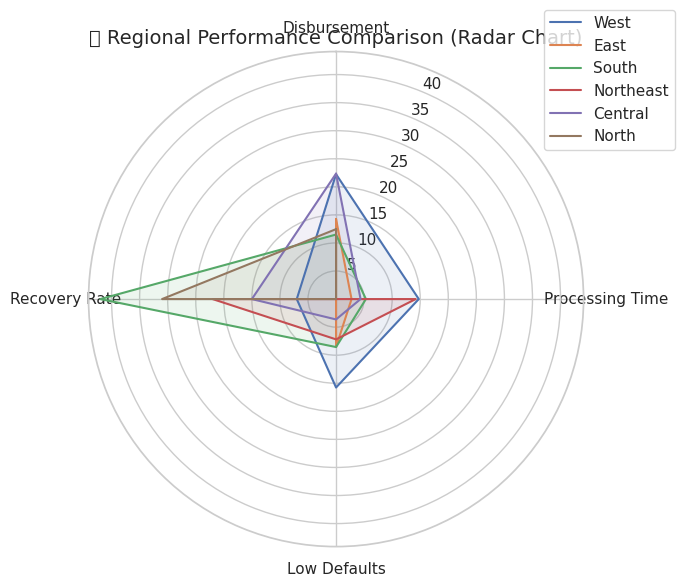

In [ ]:
# Required for radar chart
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Normalize (invert ranks where lower is better)
region_radar = region_summary.copy()
region_radar['Disbursement_Score'] = region_radar['Disbursement_Rank'].max() - region_radar['Disbursement_Rank']
region_radar['Processing_Score'] = region_radar['Processing_Efficiency_Rank'].max() - region_radar['Processing_Efficiency_Rank']
region_radar['Default_Score'] = region_radar['Default_Rate_Rank'].max() - region_radar['Default_Rate_Rank']
region_radar['Recovery_Score'] = region_radar['Recovery_Rate_Rank'].max() - region_radar['Recovery_Rate_Rank']

# Step 2: Prepare chart data
metrics = ['Disbursement_Score', 'Processing_Score', 'Default_Score', 'Recovery_Score']
labels = ['Disbursement', 'Processing Time', 'Low Defaults', 'Recovery Rate']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Plot for each region
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for region, row in region_radar.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close loop
    ax.plot(angles, values, label=region)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("📊 Regional Performance Comparison (Radar Chart)", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


/tmp/ipython-input-19-89030191.py:36: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


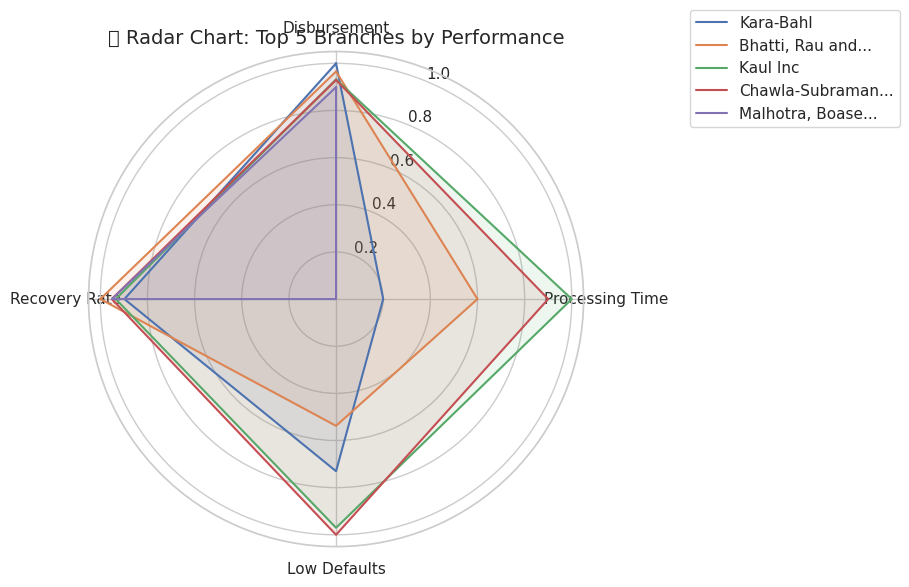

In [ ]:
# Step 1: Select top 5 branches by Loan Disbursement
top_branches = final_branch_ranks.sort_values('Disbursement_Rank').head(5).copy()

# Normalize scores for radar chart (higher is better)
top_branches['Disbursement_Score'] = top_branches['Loan_Disbursement_Amount'] / top_branches['Loan_Disbursement_Amount'].max()
top_branches['Processing_Score'] = top_branches['Avg_Processing_Time'].max() - top_branches['Avg_Processing_Time']
top_branches['Processing_Score'] /= top_branches['Processing_Score'].max()

top_branches['Default_Score'] = top_branches['Default_Rate'].max() - top_branches['Default_Rate']
top_branches['Default_Score'] /= top_branches['Default_Score'].max()

top_branches['Recovery_Score'] = top_branches['Recovery_Rate'] / top_branches['Recovery_Rate'].max()

# Step 2: Prepare for radar chart
metrics = ['Disbursement_Score', 'Processing_Score', 'Default_Score', 'Recovery_Score']
labels = ['Disbursement', 'Processing Time', 'Low Defaults', 'Recovery Rate']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Step 3: Plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for idx, row in top_branches.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # close the loop
    label = f"{row['Branch_Name'][:15]}..." if len(row['Branch_Name']) > 15 else row['Branch_Name']
    ax.plot(angles, values, label=label)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("🏢 Radar Chart: Top 5 Branches by Performance", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


In [ ]:
# Task 5: Customer Segmentation


with this we have completed upto task 4 of the assignment. to proceed with task 5.

In [ ]:
import pandas as pd

# Load dataset (update path if necessary)
customers_df = pd.read_csv('customers.csv')

# Clean column names (optional but useful if there's extra whitespace or trailing dots)
customers_df.columns = customers_df.columns.str.strip().str.replace(r'\.+$', '', regex=True)

# Define segmentation functions
def income_segment(income):
    if income >= 80000:
        return 'High Income'
    elif income >= 40000:
        return 'Middle Income'
    else:
        return 'Low Income'

def credit_segment(score):
    if score >= 750:
        return 'Excellent Credit'
    elif score >= 600:
        return 'Good Credit'
    else:
        return 'Poor Credit'

# Apply segments
customers_df['Income_Segment'] = customers_df['Annual_Income'].apply(income_segment)
customers_df['Credit_Segment'] = customers_df['Credit_Score'].apply(credit_segment)

# Preview results
customers_df[['Customer_ID', 'Annual_Income', 'Income_Segment', 'Credit_Score', 'Credit_Segment']].head()


,Customer_ID,Annual_Income,Income_Segment,Credit_Score,Credit_Segment
0,C000001,886810,High Income,433,Poor Credit
1,C000002,396746,High Income,418,Poor Credit
2,C000003,1118591,High Income,736,Good Credit
3,C000004,524075,High Income,353,Poor Credit
4,C000005,1219355,High Income,735,Good Credit


In [ ]:
# Count of customers in each segment combination
segment_counts = customers_df.groupby(['Income_Segment', 'Credit_Segment']).size().reset_index(name='Customer_Count')
display(segment_counts)


,Income_Segment,Credit_Segment,Customer_Count
0,High Income,Excellent Credit,12813
1,High Income,Good Credit,18852
2,High Income,Poor Credit,38335


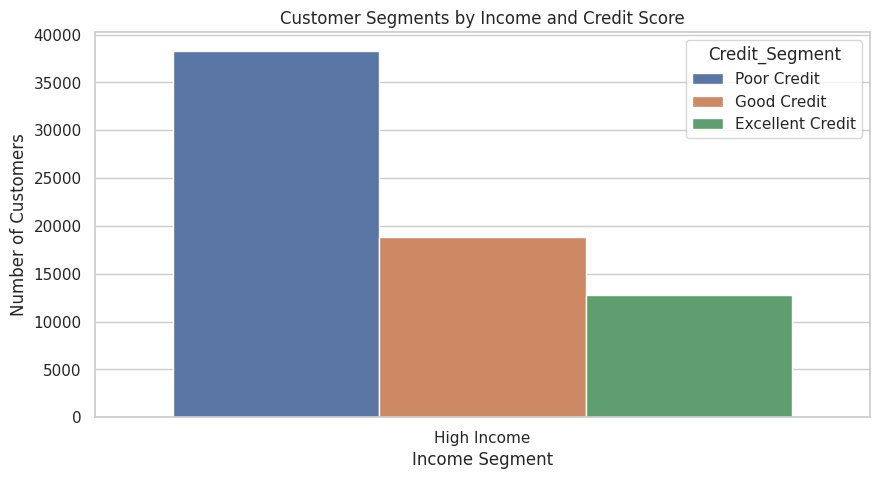

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=customers_df, x='Income_Segment', hue='Credit_Segment')
plt.title('Customer Segments by Income and Credit Score')
plt.xlabel('Income Segment')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
# Save the final cleaned and segmented dataset
customers_df[['Customer_ID', 'Annual_Income', 'Income_Segment', 'Credit_Score', 'Credit_Segment']].to_csv('/content/customer_segments.csv', index=False)


In [ ]:
# Load loan data
loan_df = pd.read_csv('loans.csv')

# Preview data
loan_df.head()


,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Disbursal_Date,Repayment_Start_Date,Repayment_End_Date,Loan_Status,Overdue_Amount,EMI_Amount,Collateral_Details
0,L000001,C045929,4030468,8.45,24,3/25/2023,4/25/2023,3/25/2025,Active,0,18668,Property
1,L000002,C038991,3498647,11.90,48,10/23/2023,11/23/2023,10/23/2027,Closed,44003,36012,Property
2,L000003,C046662,4871438,9.74,24,7/30/2024,8/30/2024,7/30/2026,Overdue,0,26347,NaN
3,L000004,C040268,541515,13.55,24,11/22/2024,12/22/2024,11/22/2026,Active,0,16106,NaN
4,L000005,C067057,631036,10.10,36,3/30/2024,4/30/2024,3/30/2027,Overdue,0,10127,NaN


In [ ]:
import pandas as pd

# Load the financial dataset (replace with your actual filename)
df = pd.read_csv('/content/loans.csv')  # or merge with customer_df if needed

df.head()


,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Disbursal_Date,Repayment_Start_Date,Repayment_End_Date,Loan_Status,Overdue_Amount,EMI_Amount,Collateral_Details
0,L000001,C045929,4030468,8.45,24,3/25/2023,4/25/2023,3/25/2025,Active,0,18668,Property
1,L000002,C038991,3498647,11.90,48,10/23/2023,11/23/2023,10/23/2027,Closed,44003,36012,Property
2,L000003,C046662,4871438,9.74,24,7/30/2024,8/30/2024,7/30/2026,Overdue,0,26347,NaN
3,L000004,C040268,541515,13.55,24,11/22/2024,12/22/2024,11/22/2026,Active,0,16106,NaN
4,L000005,C067057,631036,10.10,36,3/30/2024,4/30/2024,3/30/2027,Overdue,0,10127,NaN


In [ ]:
# Select relevant columns
risk_vars = ['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Overdue_Amount', 'Default_Flag']

# Compute correlation matrix - using loan_customer which has all required columns
corr_matrix_risk = loan_customer[risk_vars].corr()

# Display
print("Correlation Matrix – Risk Variables")
print(corr_matrix_risk)

Correlation Matrix – Risk Variables
                Credit_Score  Loan_Amount  Interest_Rate  Overdue_Amount  \
Credit_Score        1.000000     0.000262       0.002498        0.001990   
Loan_Amount         0.000262     1.000000      -0.003451        0.008249   
Interest_Rate       0.002498    -0.003451       1.000000       -0.002700   
Overdue_Amount      0.001990     0.008249      -0.002700        1.000000   
Default_Flag       -0.001724    -0.002401      -0.004763        0.000020   

                Default_Flag  
Credit_Score       -0.001724  
Loan_Amount        -0.002401  
Interest_Rate      -0.004763  
Overdue_Amount      0.000020  
Default_Flag        1.000000  


In [ ]:
loan_df['Default_Amount'] = loan_df['Overdue_Amount']


In [ ]:
# Recovery_Rate = 1 - (Overdue_Amount / Loan_Amount)
loan_df['Recovery_Rate'] = loan_df.apply(
    lambda row: 1 - (row['Overdue_Amount'] / row['Loan_Amount']) if row['Loan_Amount'] > 0 else 0,
    axis=1
)



In [ ]:
loan_df['Default_Amount'] = loan_df['Overdue_Amount']


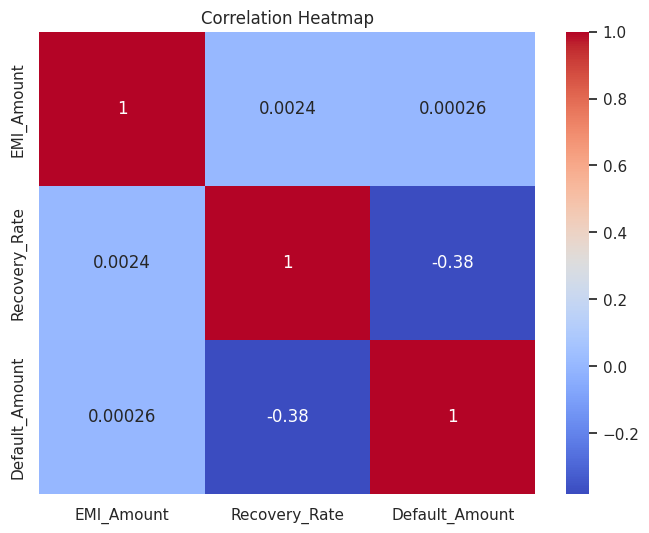

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now select only the columns that exist
heatmap_vars = ['EMI_Amount', 'Recovery_Rate', 'Default_Amount']

heatmap_corr = loan_df[heatmap_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
branch_df = pd.read_csv('/content/branches.csv')


In [ ]:
numeric_cols = ['Total_Customers', 'Total_Active_Loans', 'Delinquent_Loans',
                'Loan_Disbursement_Amount', 'Avg_Processing_Time', 'Relationship_Manager_Count']

branch_df[numeric_cols] = branch_df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [ ]:
# branch_df['Delinquency_Rate'] = branch_df['Delinquent_Loans'] / branch_df['Total_Active_Loans']


In [ ]:
branch_df['Delinquency_Rate'] = branch_df.apply(
    lambda row: row['Delinquent_Loans'] / row['Total_Active_Loans'] if row['Total_Active_Loans'] > 0 else 0,
    axis=1
)


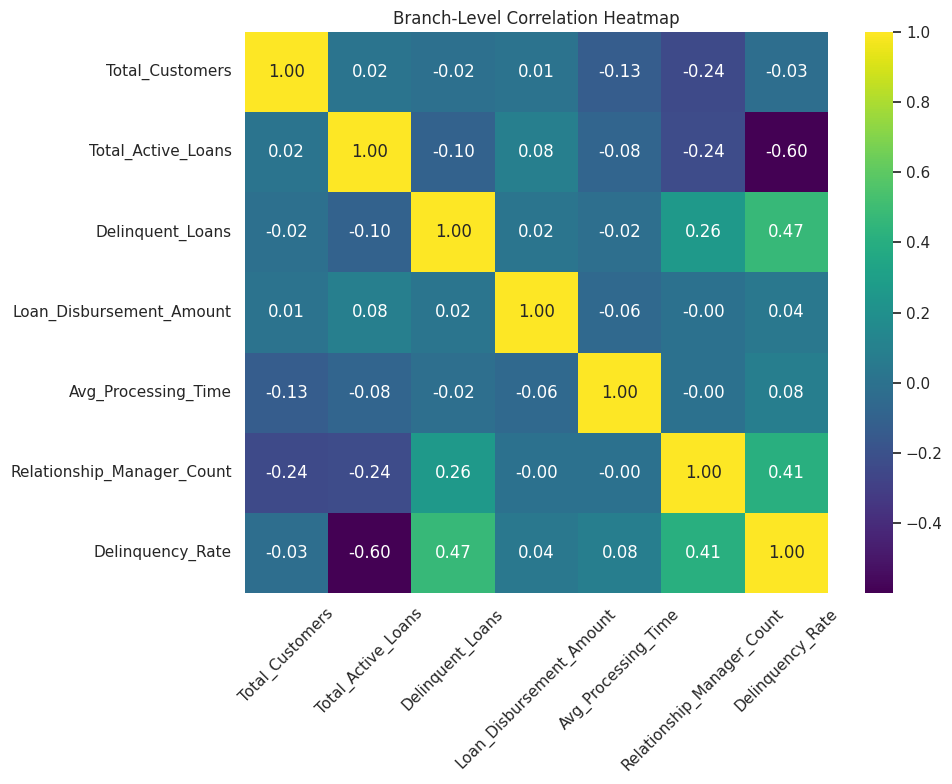

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose variables to include in heatmap
branch_corr_vars = ['Total_Customers', 'Total_Active_Loans', 'Delinquent_Loans',
                    'Loan_Disbursement_Amount', 'Avg_Processing_Time',
                    'Relationship_Manager_Count', 'Delinquency_Rate']

branch_corr = branch_df[branch_corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(branch_corr, annot=True, cmap='viridis', fmt=".2f")
plt.title('Branch-Level Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Certainly. Here's the updated footnote with just the task headings (1 to 6) added:

---

### 📌 **Footnote**

> *This notebook is  where Tasks 1 through 6 were completed. Due to increased data volume and the integration of multiple visualizations and large intermediate outputs, the earlier file became resource-heavy. To ensure smoother performance and maintain modularity, Task 7 onwards will be executed in this separate notebook.*
>
> **Completed Tasks in Previous Notebook:**
>
> 1. Data Loading and Cleaning
> 2. Customer Demographic Analysis
> 3. Financial Behavior Insights
> 4. Risk Profiling
> 5. Customer Segmentation
> 6. Advanced Statistical Analysis


